In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\Data\dnn_dataset.csv')
n= data.shape[1]-1 # number of features
#feature_columns = [f'feature{i+1}' for i in range(n)]
X_data=data.iloc[:, :-1]
X=X_data.values
# X contains all columns of 'data' except the last one

y_data = data['target']
y=y_data.values.reshape(-1,1)

In [3]:
X.shape

(3500, 2)

In [4]:
y.shape

(3500, 1)

In [5]:
m=X.shape[0] #number of data points
print('m=', m)
n=X.shape[1] #number of features
print('n=', n)

m= 3500
n= 2


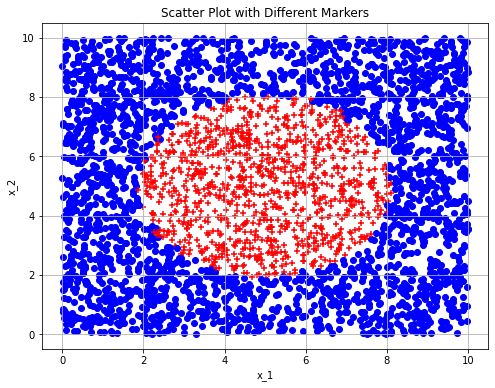

In [6]:
# Plot scatter plot with different styles for y[i] = 1 and y[i] = 0
plt.figure(figsize=(8, 6))
for i in range(m):
    if y[i] == 1:
        plt.scatter(X[i,0], X[i,1], color='red', marker='+')
    else:
        plt.scatter(X[i,0], X[i,1], color='blue', marker='o')

plt.title('Scatter Plot with Different Markers')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.grid(True)
plt.show()

In [7]:
def color_grid(X, y, resolution=100):
    # Initialize a grid with higher resolution
    grid = np.zeros((resolution, resolution, 3))  # 3 for RGB color channels

    # Adjust the coordinates to fit the new resolution
    X_adjusted = np.round(X * (resolution / 10)).astype(int)
    X_adjusted = np.clip(X_adjusted, 0, resolution - 1)

    # For each cell in the grid, determine the closest point in X
    for i in range(resolution):
        for j in range(resolution):
            # Compute distances from this grid cell to each point in X
            distances = np.sqrt(np.sum((X_adjusted - np.array([i, j]))**2, axis=1))
            
            # Find the index of the closest point in X
            closest_point_idx = np.argmin(distances)

            # Color the cell based on the label of the closest point
            if y[closest_point_idx] == 1:
                grid[i, j] = [1, 0, 0]  # Red
            else:
                grid[i, j] = [0, 0, 1]  # Blue

    # Display the grid
    plt.imshow(grid, origin='lower')
    plt.show()


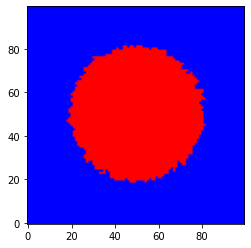

In [8]:
color_grid(X, y)

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
y_train = y_train.ravel()

In [10]:
# Create logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

# Print the coefficients
w_hat=model.coef_
print("Coefficients:", w_hat)

# Print the bias (intercept)
b_hat=model.intercept_
print("Bias (intercept):", b_hat)

Model Accuracy: 0.7177142857142857
Coefficients: [[ 0.01260074 -0.00270795]]
Bias (intercept): [-0.86642131]


In [11]:
y_pred_log=model.predict(X)

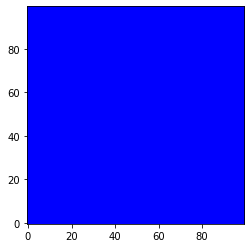

In [12]:
color_grid(X, y_pred_log)

In [13]:
y_pred_log[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
def plot_line(w, b,x_train,y_train):
    
    sorted_x = np.sort(x_train[:,0], axis=0)
    w=w.reshape(-1,1)
    y = -(w[0,0] * sorted_x + b) / w[1,0]

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_x , y, label="Decision Boundary")
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.grid(True)
    plt.legend()
    
    X_zeros =x_train[y_train.flatten() == 0]
    X_ones = x_train[y_train.flatten() == 1]
    # Plotting points
    plt.scatter(X_zeros[:, 0], X_zeros[:, 1], marker='o', color='blue', label='y = 0')
    plt.scatter(X_ones[:, 0], X_ones[:, 1], marker='+', color='red', label='y = 1')
    plt.title('Scatter Plot of X by Class in y') 
    
    
    plt.show()


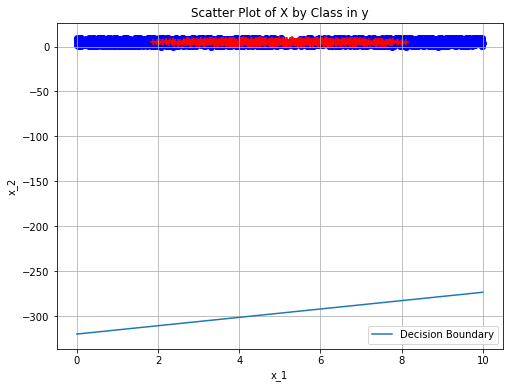

In [15]:
plot_line(w_hat, b_hat,X_train,y_train)

In [16]:
# Step 1: Create the Neural Network Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(n,))  # One output neuron, sigmoid activation
])

# Step 2: Compile the Model
model_1.compile(optimizer='adam',  # Using Adam optimizer
              loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
              metrics=['accuracy'])  # We are interested in tracking accuracy

# Step 3: Train the Model
history = model_1.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)  # Train for 100 epochs

# Step 4: Evaluate the Model
test_loss, test_accuracy = model_1.evaluate(X_test, y_test, verbose=0)

# Output the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Test Loss: 0.5968099236488342
Test Accuracy: 0.7177143096923828


In [17]:
y_pred_N1=model_1.predict(X)

110/110 [==============================] - 0s 782us/step


In [18]:
y_pred_N1[0:10]

array([[0.29927522],
       [0.31688452],
       [0.30690092],
       [0.310585  ],
       [0.30947208],
       [0.3007375 ],
       [0.3150354 ],
       [0.30264288],
       [0.30102116],
       [0.3148003 ]], dtype=float32)

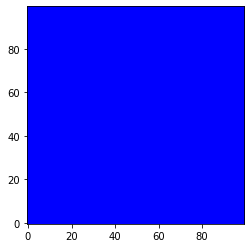

In [19]:
y_d= np.where(y_pred_N1 > 0.5, 1, 0)
color_grid(X, y_d)

In [20]:
from tensorflow.keras import regularizers

# Step 1: Create the Neural Network Model with L2 Regularization
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(n,)),    #input size
    tf.keras.layers.Dense(5, activation='relu',
                          kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization in the first layer
    tf.keras.layers.Dense(1, activation='sigmoid',
                          kernel_regularizer=regularizers.l2(0.01))   # L2 regularization in the output layer
])

# Step 2: Compile the Model
model_2.compile(optimizer='adam',  # Using Adam optimizer
              loss=tf.keras.losses.BinaryCrossentropy(),  # Binary cross-entropy loss for binary classification
              metrics=['accuracy'])  # We are interested in tracking accuracy

# Step 3: Train the Model
history = model_2.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)  # Train for 100 epochs

# Step 4: Evaluate the Model
test_loss, test_accuracy = model_2.evaluate(X_test, y_test, verbose=0)

# Output the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Test Loss: 0.4009498357772827
Test Accuracy: 0.8851428627967834


110/110 [==============================] - 0s 813us/step


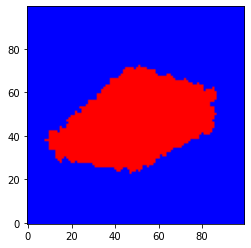

In [21]:
y_pred_2=model_2.predict(X)
y_d= np.where(y_pred_2 > 0.5, 1, 0)
color_grid(X, y_d)

In [22]:
large_model = tf.keras.Sequential([
    tf.keras.Input(shape=(n,)),    #input size
    tf.keras.layers.Dense(15, activation='relu',
                          kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization in the first layer
    tf.keras.layers.Dense(5, activation='relu', input_shape=(n,),
                          kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization in the first layer
    tf.keras.layers.Dense(1, activation='sigmoid',
                          kernel_regularizer=regularizers.l2(0.01))   # L2 regularization in the output layer
])

# Step 2: Compile the Model
large_model.compile(optimizer='adam',  # Using Adam optimizer
              loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
              metrics=['accuracy'])  # We are interested in tracking accuracy

# Step 3: Train the Model
history = large_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)  # Train for 100 epochs

# Step 4: Evaluate the Model
test_loss, test_accuracy = large_model.evaluate(X_test, y_test, verbose=0)

# Output the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.28820154070854187
Test Accuracy: 0.9725714325904846


110/110 [==============================] - 0s 1ms/step


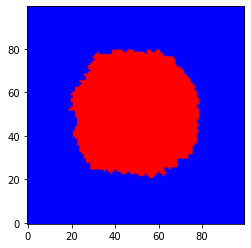

In [23]:
y_pred_l=large_model.predict(X)
y_d= np.where(y_pred_l > 0.5, 1, 0)
color_grid(X, y_d)